In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, plot_confusion_matrix


## Decision Trees

Decision trees for modeling choices have been around for a very long time, but statistical decision trees are a more recent development.

__Decision Tree Learning__ refers to the statisitcal modeling thatt uses a form of decision trees, where node splits are decided based on an information metric.

Decision trees and other tree based methods rely on the ability to split  data based on information from features, meaning that we need a mathematical definition of information and the ability to measure it.

### Terminology
> - __Splitting__, it refers to the act of taking a node and spllitting it whether its _True_ or _False_.

> - __Nodes__, they are the points where data comes in, and or goes out.
>   - __Root Node__, they are the initial condition or feature where we check or split on.
>   - __Leaf (Terminal) Nodes__, they are the end of the line for conditions or features where no data comes out.
>   - __Parent/Children Nodes__, They refer to the relationship between nodes, and how they are structured.

> - __Tree Branches (Sub Trees)__, they are the offshoots of our tree where data splits.

> - __Pruning__, its the act of shortening a tree by removing redundant data by removing a branch and transforming it into a leaf.


## Gini Impurity

It is a mathematical measure of how pure the information in a data set is. We could think of it as a measurement of class uniformity. This is given by the following equation.

$$
G(Q) = \sum_{c\in C}p_c (1-p_C)
$$

Wih $p_c$ equals to the probability of it belonging to the class $c$.

$$
p_c = \frac{1}{N_Q} \sum_{x \in Q}\mathbf{1}(y_{class}=c)
$$

If we plot out this function we can see that it is a curve starting at $(0,0)$ going up to $0.5$ and ending back at $(1,0)$. Meaning our max value for a gini impurity is $0.5$. 

If we get a Gini Impurity of 0 or 1, it means it is equals to one single class.

### Dealing with continous numerical categories

For this we will calculate the Gini impurity for each possible split and we will choose the split that gives us the lowest impurity. If possible we should choose the $G(Q)=0$, but in real data sets, we might not get a value of $0$.


### Dealing with multicategorical features

For this we want to calculate the Gini impurity for all possible combinations. We will check conditions that include multiple categories. Finally we will choose the split that gives us the lowest impurity. 

# Python code

Let's start by importing and checking our data.

In [24]:
df = pd.read_csv('../DATA/penguins_size.csv')

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Let's see the unique species in our data. We can also see that we have some missing data which we will need to clean.

In [25]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

We can see how many data we are missing here.

In [26]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [27]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


We can see that for the sex feature, we have one row that has a '.' as our value, we could remove this row, but as it has all the values, we could estimate the correct sex for this penguin.

In [28]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [29]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


We can see from this result that our penguin is closer to a Female results. But for other values we see that it is closer to a Male result. But our body mass shows that their weight is close to a Female penguin.

In [30]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

Let's now relabel this penguin to Female. 

In [31]:
df.at[336,'sex'] = 'FEMALE'

In [32]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

Let's now make a pairplot to verify how distinct are our species. We can see that for some of the features we have a clearly distinct separation.

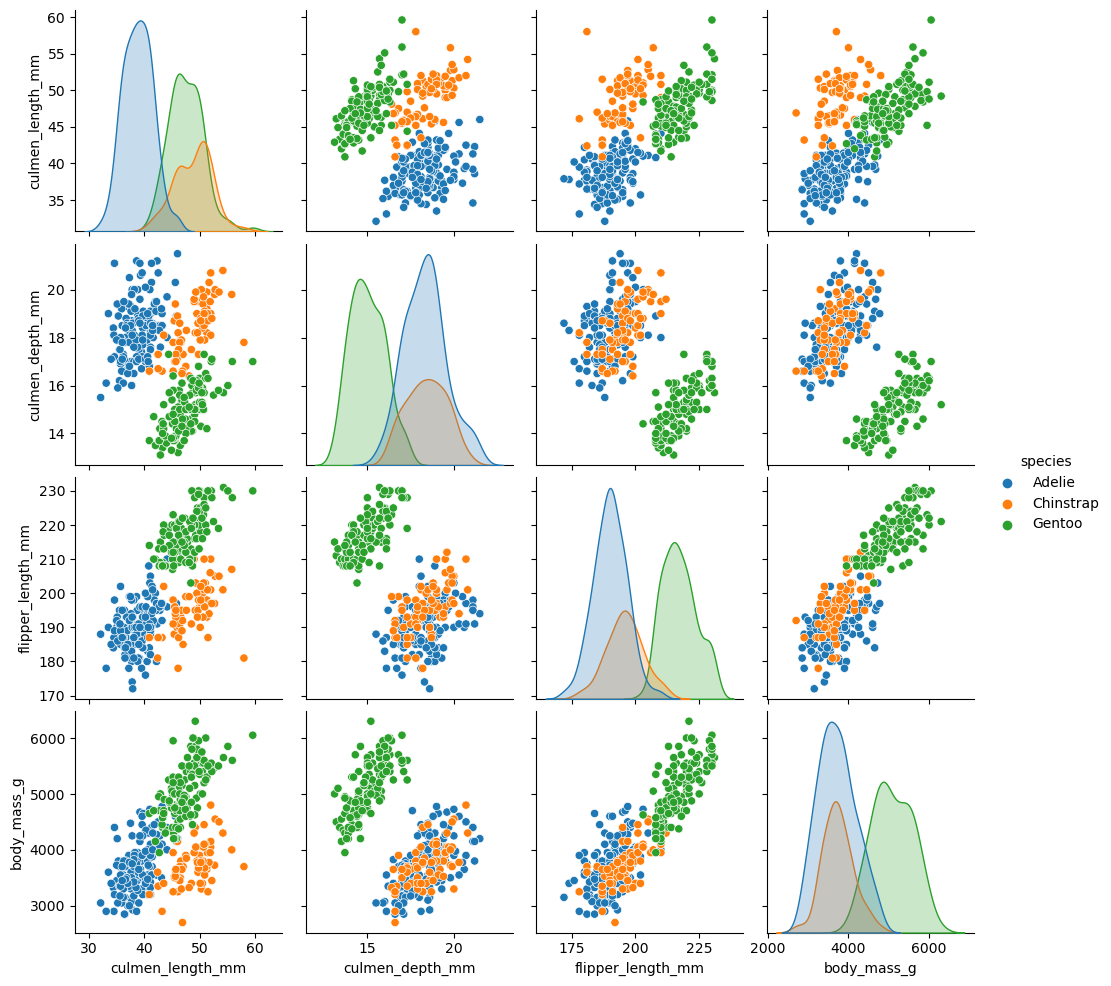

In [33]:
sns.pairplot(df, hue='species')

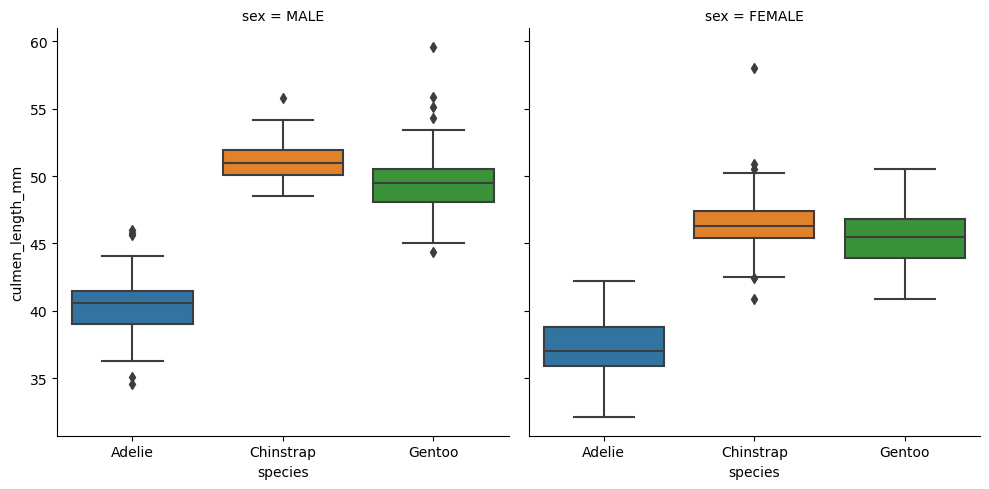

In [34]:
sns.catplot(data=df, x='species', y='culmen_length_mm', kind='box',
            col= 'sex')

Let's now get the dummy variables for our 'Island' and 'sex' categories, dropping our 'species' column as this will be the target column. And we will also create our train test split.

In [35]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=0.3
                                       , random_state=101)

Now we can create our model and explore the hyperparameters for our decision tree.

In [39]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
base_pred = model.predict(X_test)

Let's now compare our predicted results with the actual results. We can see that with our base model we have pretty good results in  our classification report.

In [43]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



Now with our confusion matrix we can see that our performance is pretty good.

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


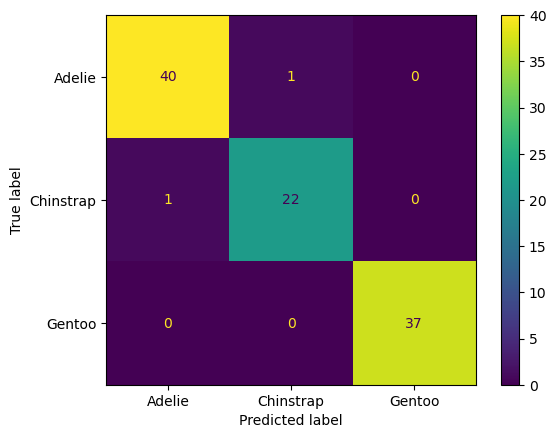

In [44]:
plot_confusion_matrix(model, X_test,y_test)

Now we can verify how important are some features doing the following.

In [47]:
pd.DataFrame(index=X.columns,
              data=model.feature_importances_, 
              columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
island_Torgersen,0.000000
sex_MALE,0.000000
body_mass_g,0.010853
culmen_depth_mm,0.052214
island_Dream,0.068185
culmen_length_mm,0.325918
flipper_length_mm,0.542829


Using the sklearn package we can now plot our decision tree. We can see that our first node refers to the flipper lenght, which is the most important  feature in our model.

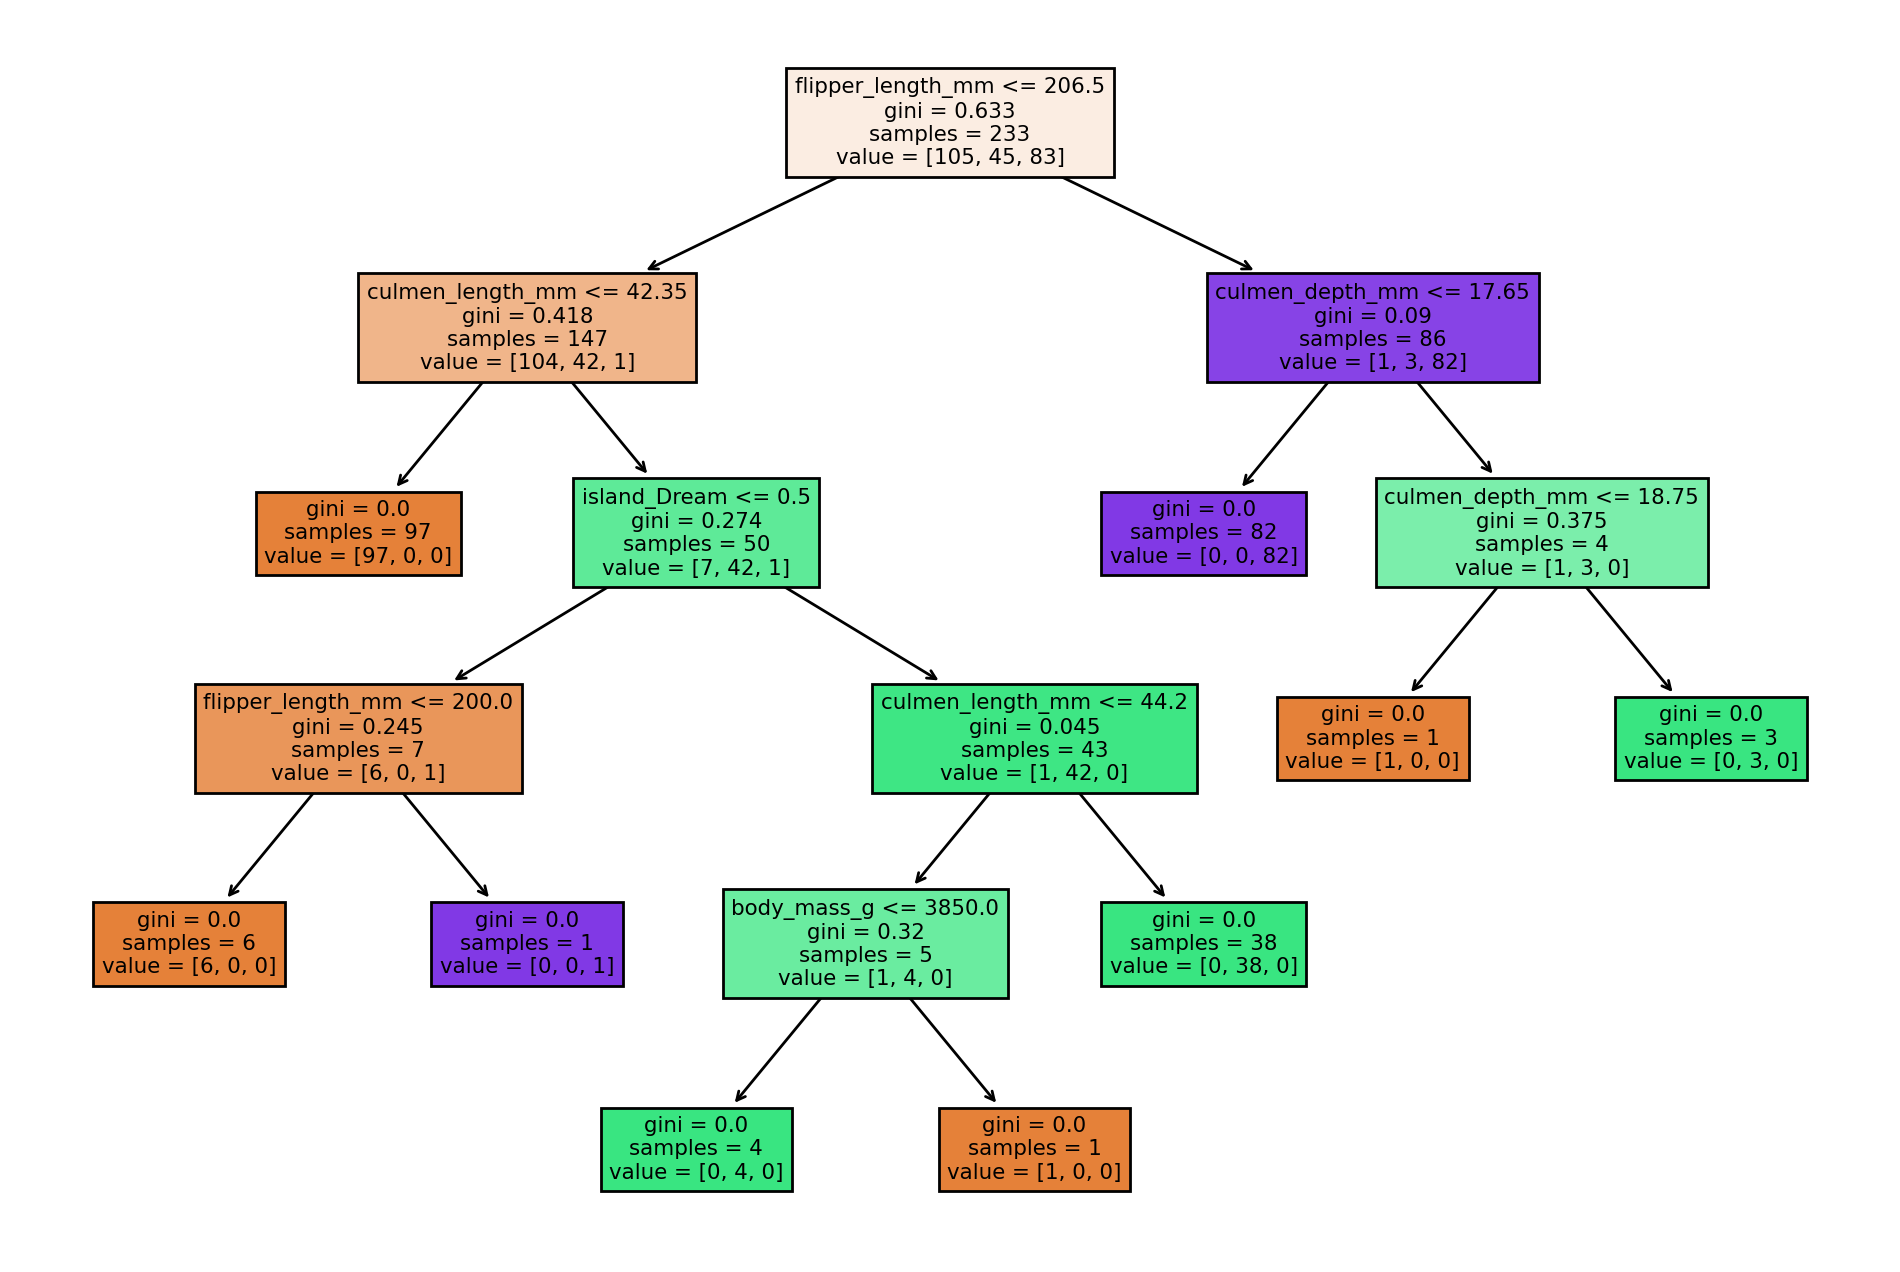

In [53]:
plt.figure(figsize=(12,8), dpi=200)

plot_tree(model, feature_names=X.columns, filled=True);

Let's now create a function that plots out our decision tree.

In [54]:
def report_model(model):
    model_pred = model.predict(X_test)
    print(classification_report(y_test,model_pred))
    print('\n')
    plt.figure(figsize=(12,8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101





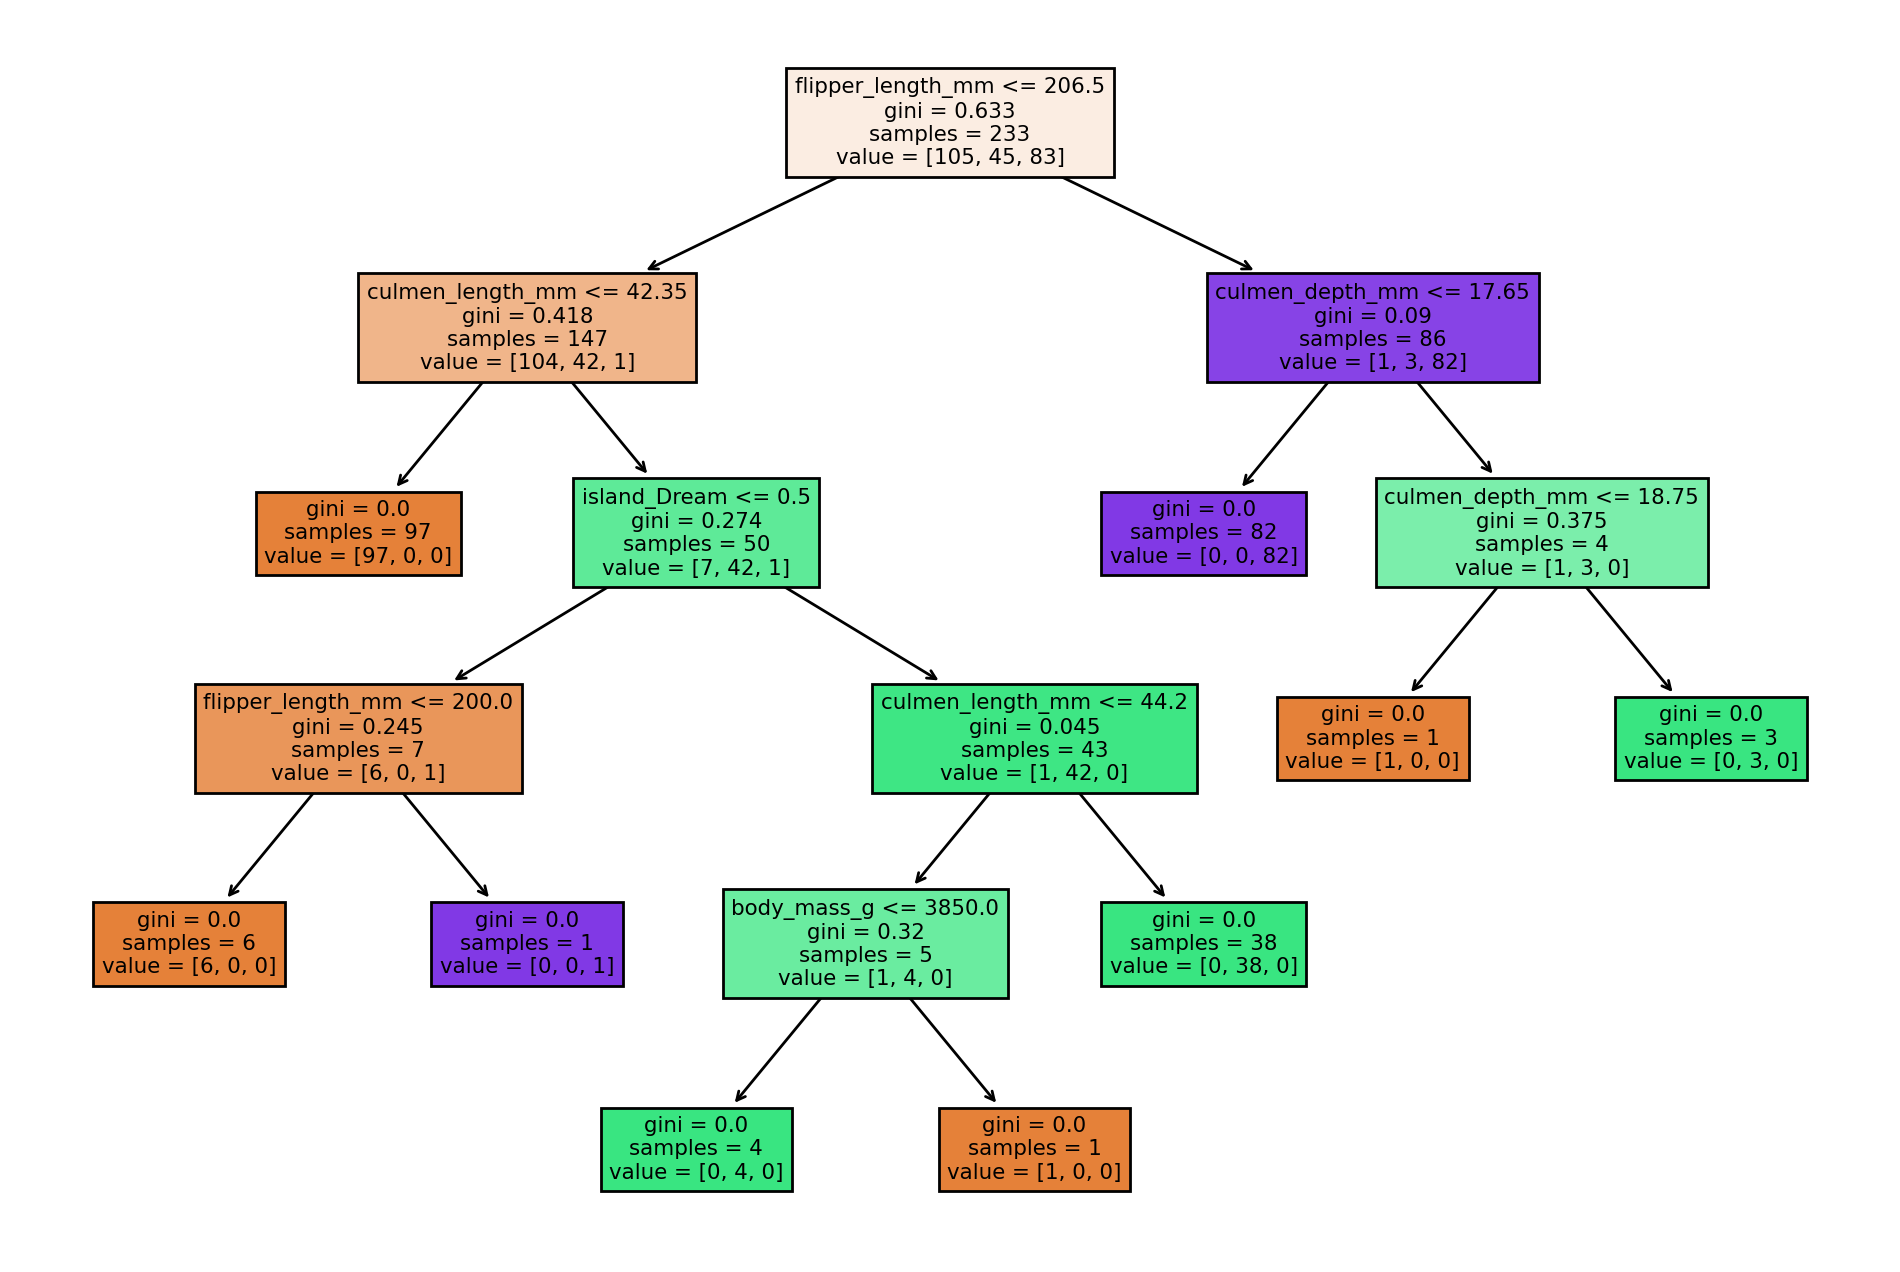

In [55]:
report_model(model)

Let's now see how we can prune our tree to reduce the level of splits we have. Currently we have 5 levels of splits.

After prunning we can see that we reduced our levels to 2, but we have lower results in our  classification matrix.

In [56]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





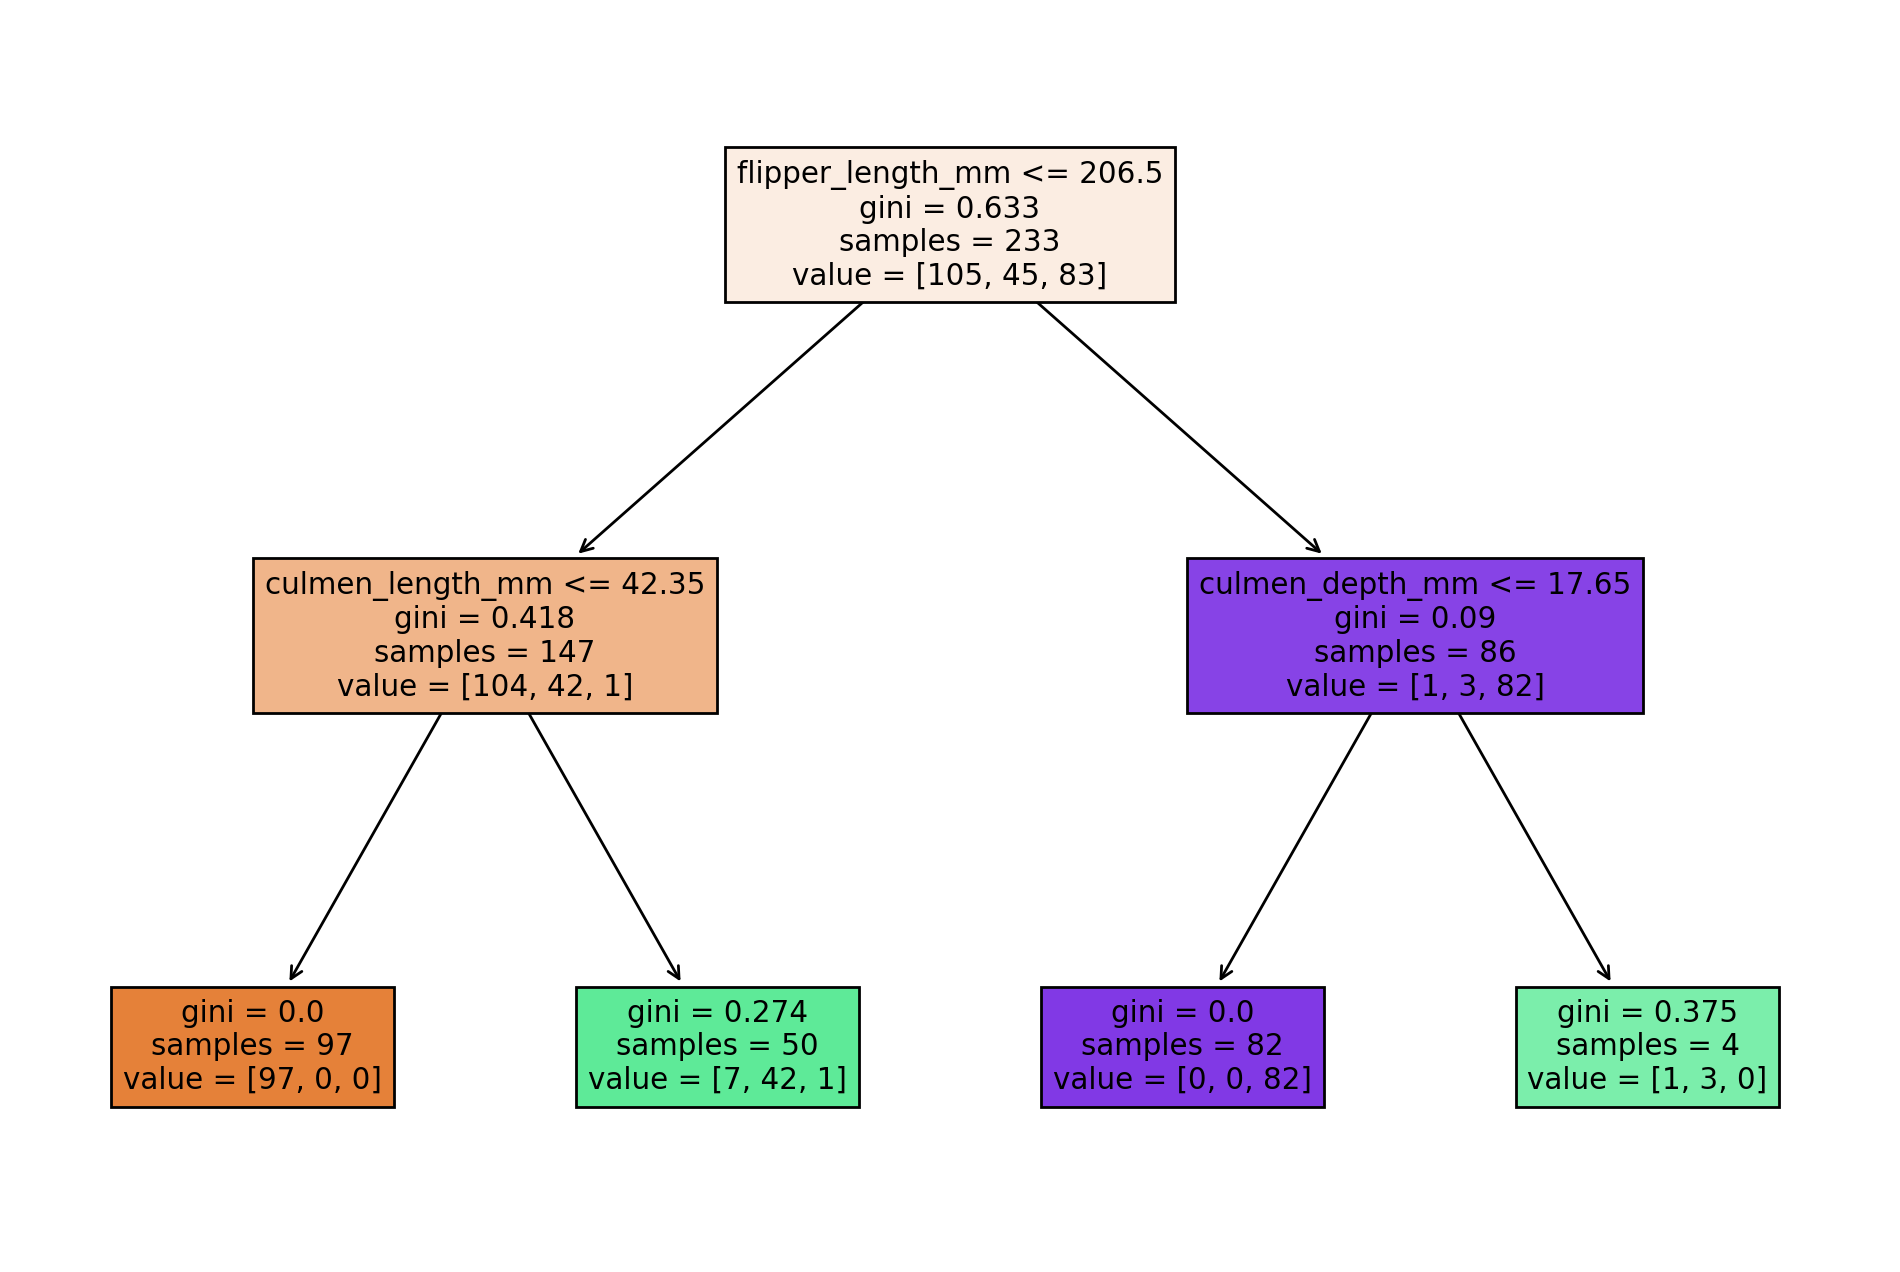

In [57]:
report_model(pruned_tree)

Let's verify the max number of leaf nodes by using our hyperparameters.

In [59]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





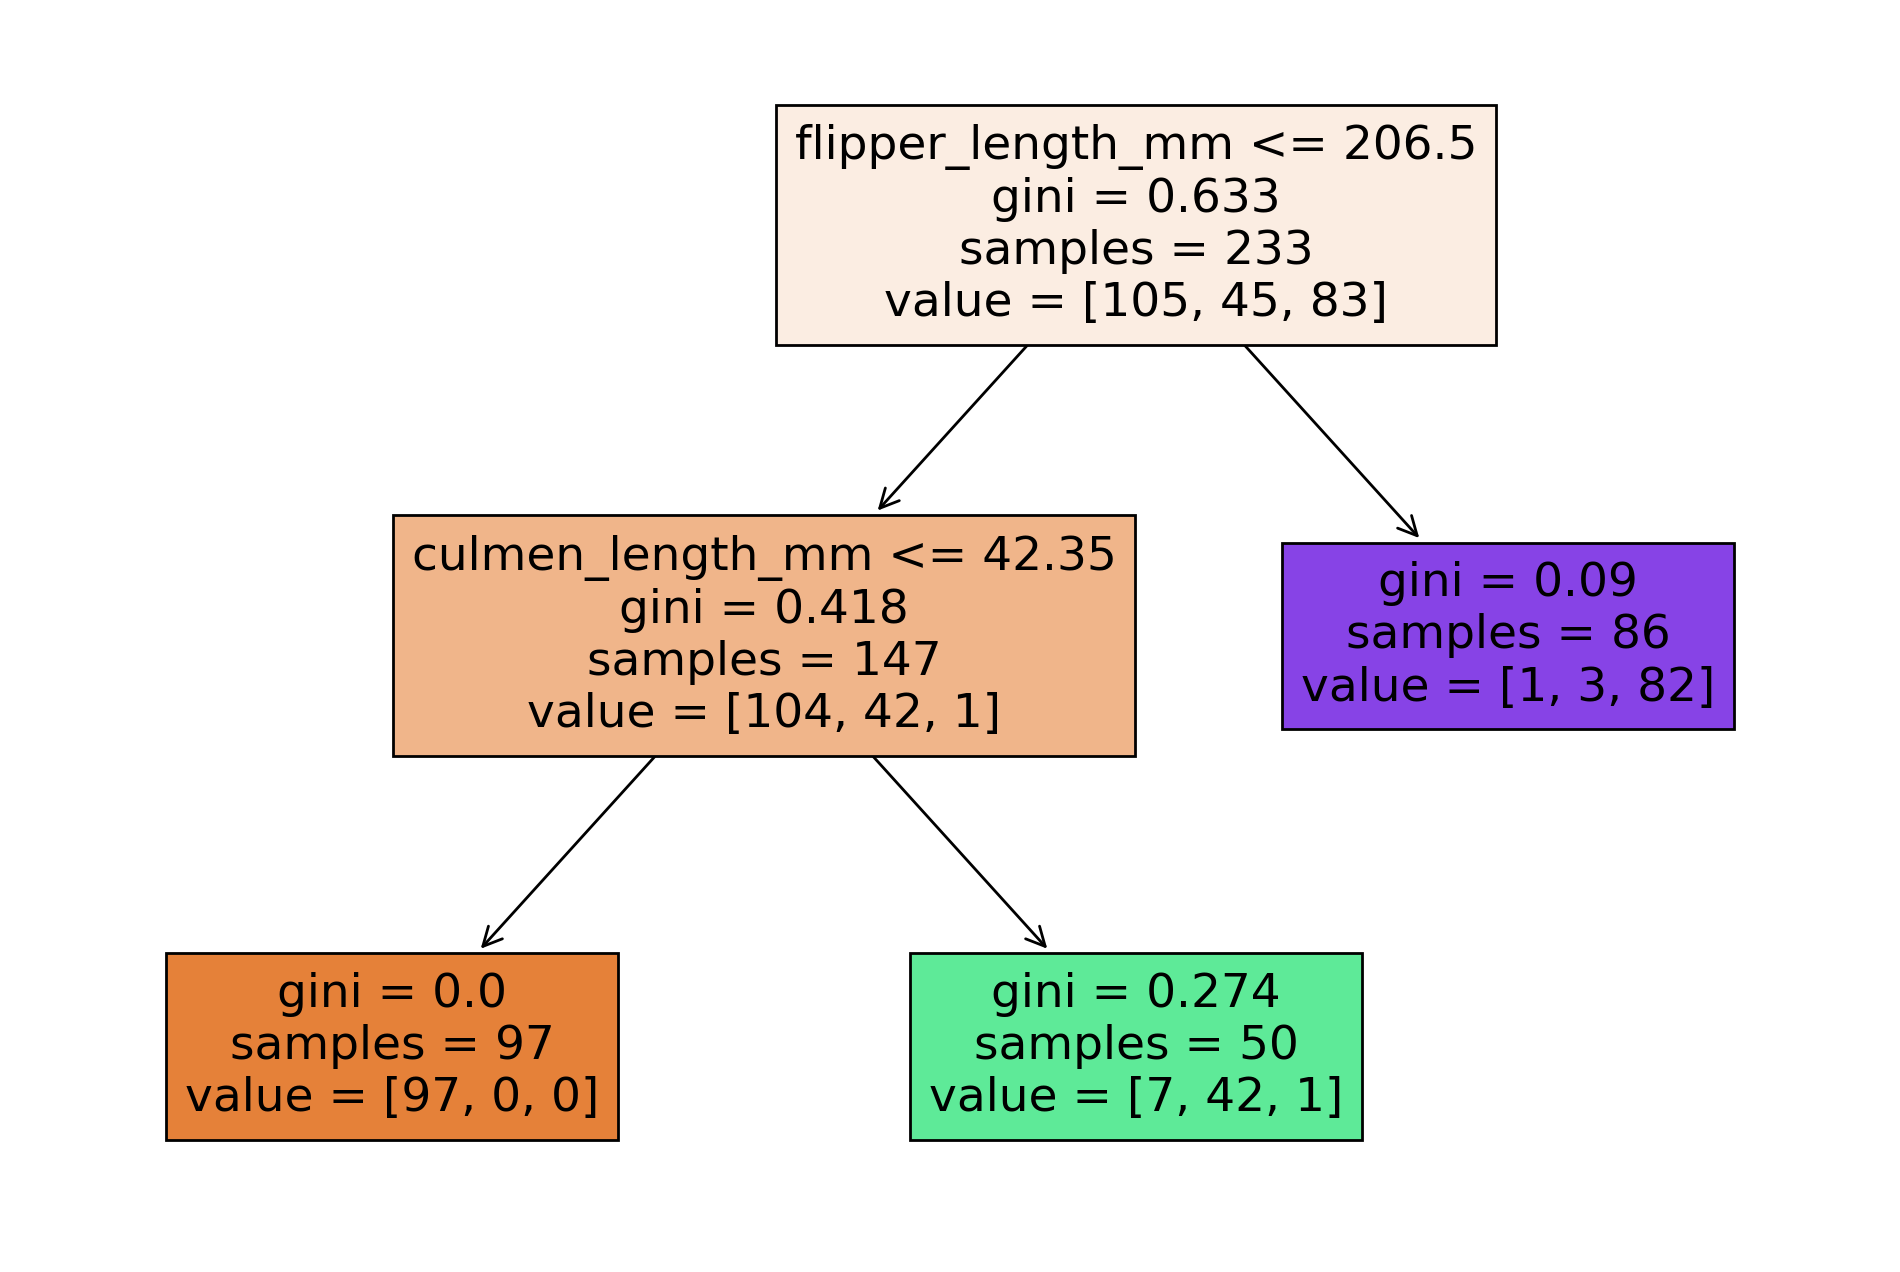

In [60]:
report_model(max_leaf_tree)

Now let's modify our criterion to give us the information gain from our model, this is called the entropy.

In [61]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





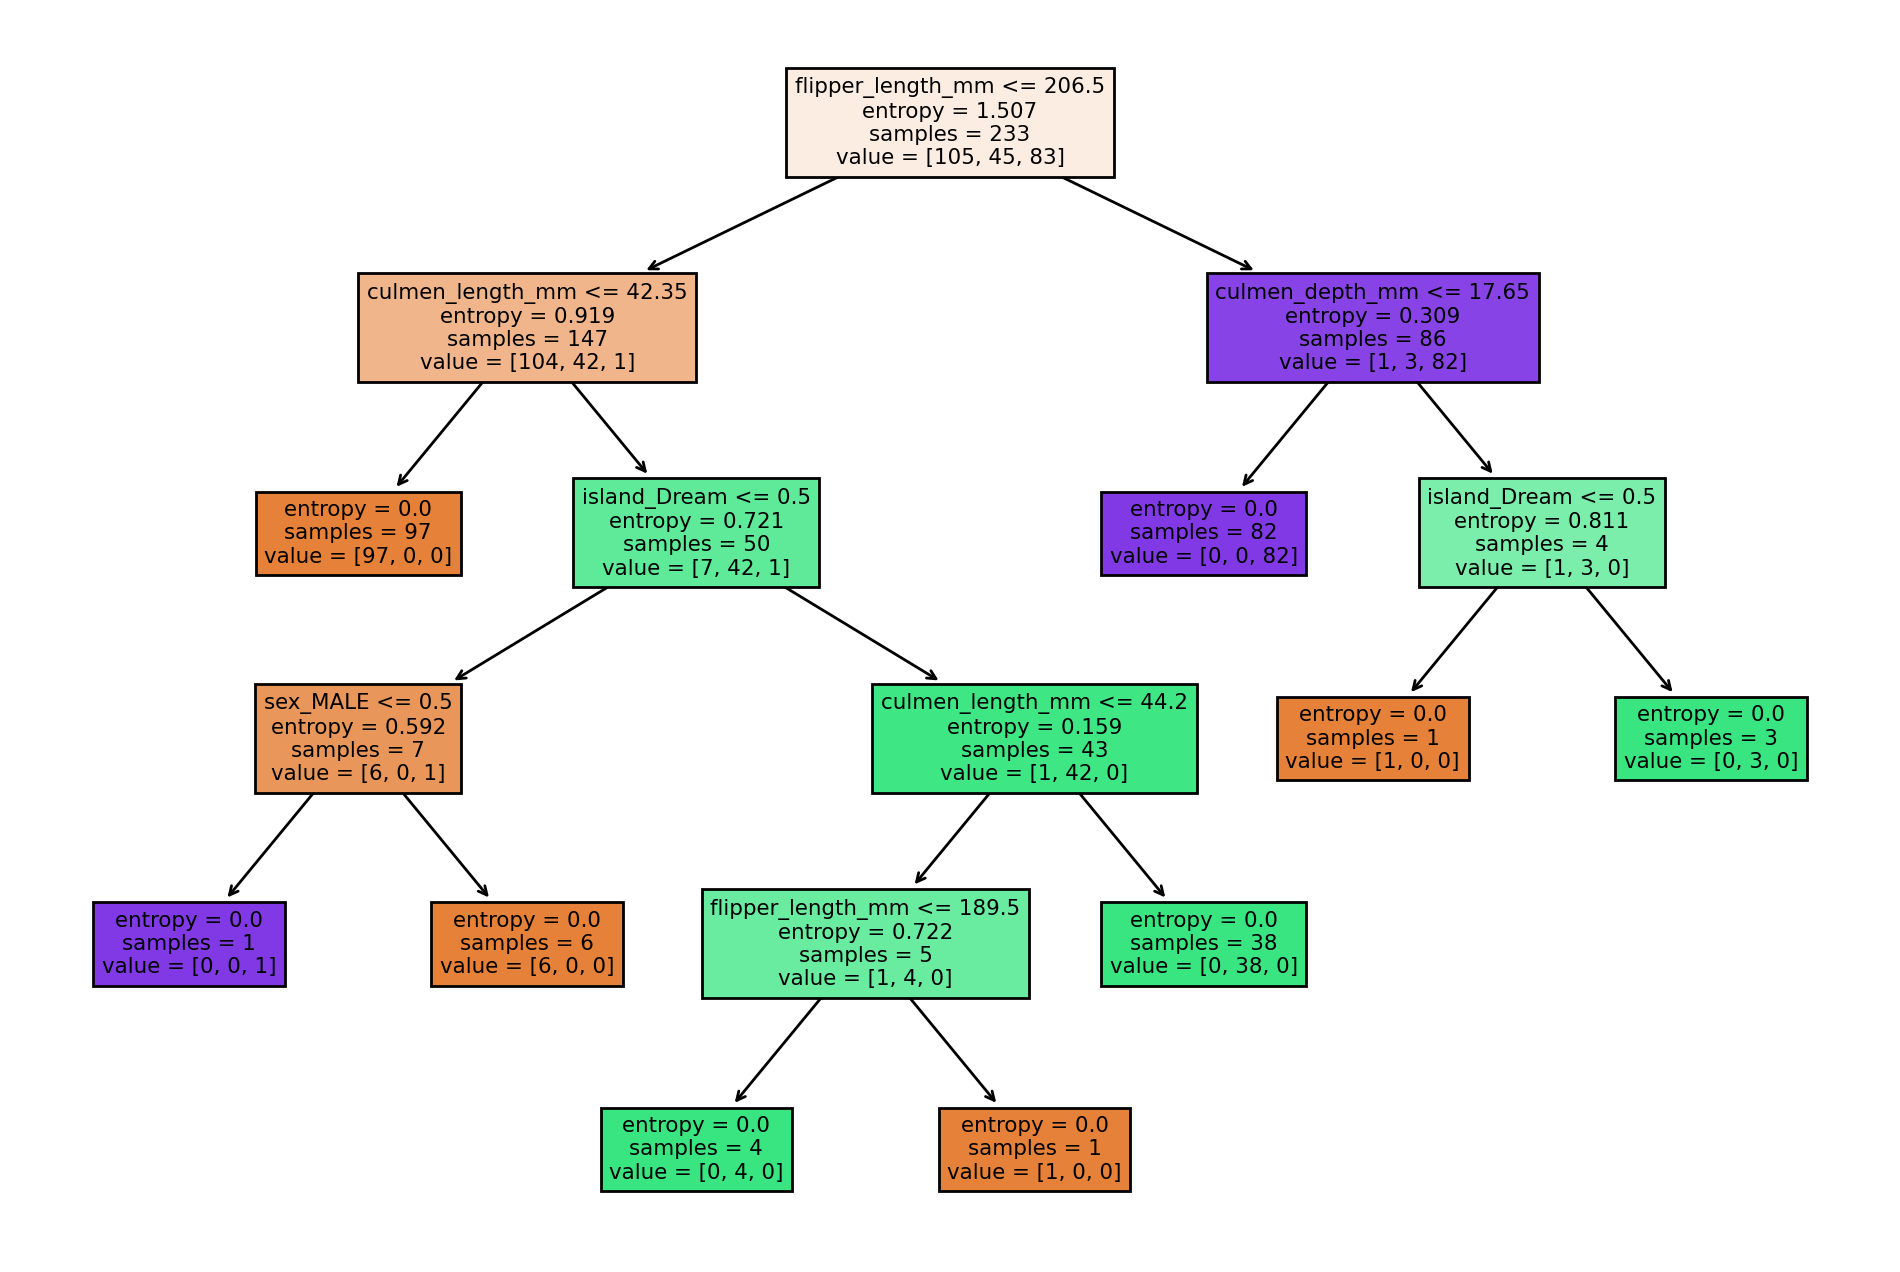

In [62]:
report_model(entropy_tree)